In [16]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [17]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
data_dir="/content/drive/MyDrive/Project/Dataset"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5076 files belonging to 5 classes.
Using 4061 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5076 files belonging to 5 classes.
Using 1015 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Bengali', 'Gujarati', 'Hindi', 'Kannada', 'Telugu']


In [ ]:
num_classes = len(class_names)
num_classes

5

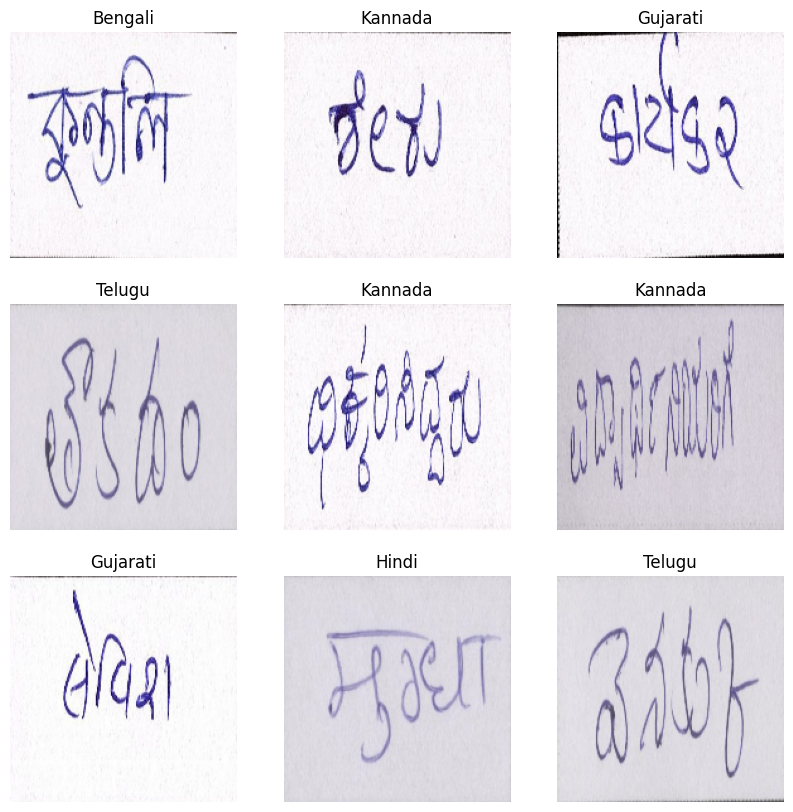

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
127/127 [==============================] - 516s 885ms/step - loss: 0.9629 - accuracy: 0.6521 - val_loss: 0.2785 - val_accuracy: 0.9044
Epoch 2/15
127/127 [==============================] - 7s 57ms/step - loss: 0.2152 - accuracy: 0.9239 - val_loss: 0.1820 - val_accuracy: 0.9369
Epoch 3/15
127/127 [==============================] - 7s 58ms/step - loss: 0.1285 - accuracy: 0.9572 - val_loss: 0.1419 - val_accuracy: 0.9507
Epoch 4/15
127/127 [==============================] - 7s 55ms/step - loss: 0.0734 - accuracy: 0.9751 - val_loss: 0.1392 - val_accuracy: 0.9517
Epoch 5/15
127/127 [==============================] - 7s 56ms/step - loss: 0.0615 - accuracy: 0.9796 - val_loss: 0.1067 - val_accuracy: 0.9655
Epoch 6/15
127/127 [==============================] - 7s 57ms/step - loss: 0.0521 - accuracy: 0.9850 - val_loss: 0.1336 - val_accuracy: 0.9567
Epoch 7/15
127/127 [==============================] - 7s 58ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.1382 - val_accuracy: 0.9

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                   

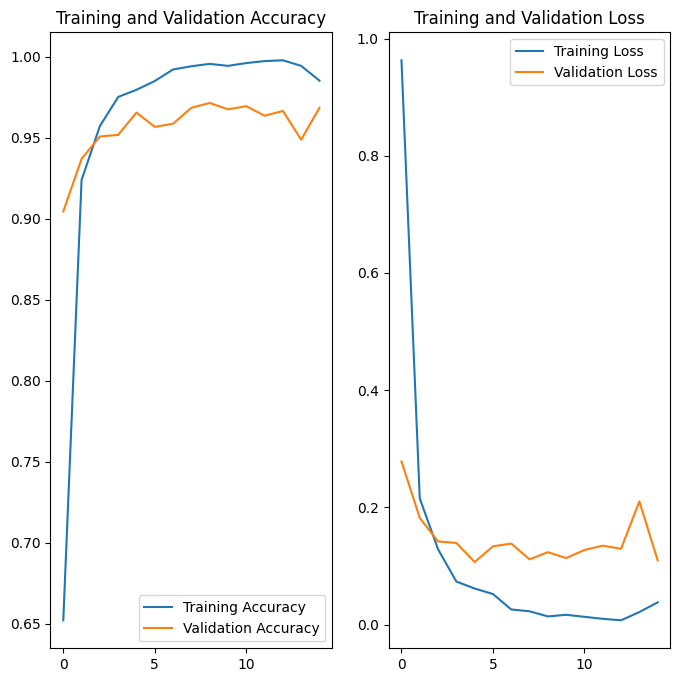

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import os

In [18]:
class_dict = {0:'Bengali', 1:'Gujarati', 2:'Hindi', 3:'Kannada', 4:'Telugu'}

1/1 [==============================] - 0s 17ms/step


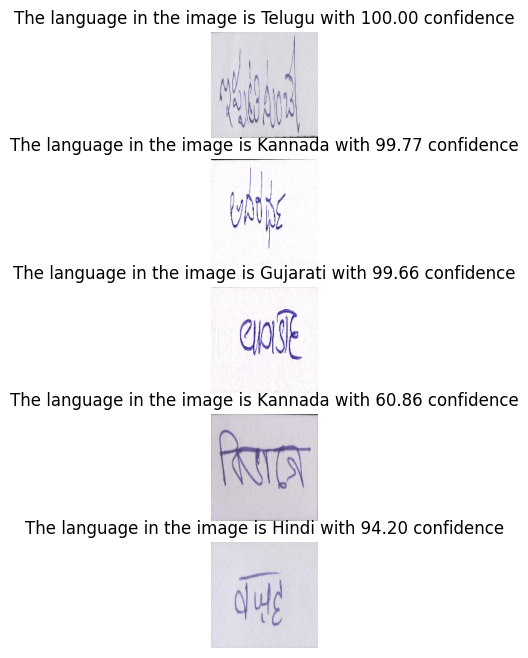

In [ ]:
img_path = "/content/drive/MyDrive/Project/Unseen/"
img_arr = os.listdir(img_path)
# img_arr
plt.figure(figsize=(8,8))
for i in range(len(img_arr)):
  sample_1 = tf.keras.utils.load_img(img_path+img_arr[i],target_size=(img_width,img_height))
  sample = tf.keras.utils.img_to_array(sample_1)
  sample = np.array([sample])
  pred = model.predict(sample)
  score = tf.nn.softmax(pred[0])
  pred_label = class_dict[np.argmax(score)]
  conf = np.max(score)*100
  plt.subplot(len(img_arr),1,i+1)
  plt.imshow(sample_1)
  plt.axis('off')
  plt.title("The language in the image is "+pred_label+" with "+str(format(conf,'.2f'))+" confidence")

In [ ]:
model.save("/content/drive/MyDrive/Project/Models/model1.keras")

In [19]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Project/Models/model1.keras")

1/1 [==============================] - 0s 33ms/step


Text(0.5, 1.0, 'The language in the image is Gujarati with 78.47 confidence')

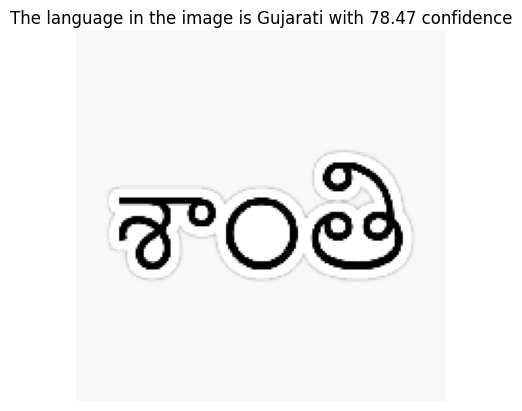

In [23]:
img_path = "tyu.jpg"
sample_1 = tf.keras.utils.load_img(img_path,target_size=(img_width,img_height))
sample = tf.keras.utils.img_to_array(sample_1)
sample = np.array([sample])
pred = model.predict(sample)
score = tf.nn.softmax(pred[0])
pred_label = class_dict[np.argmax(score)]
conf = np.max(score)*100
# plt.figure(facecolor='black')
plt.imshow(sample_1)
plt.axis('off')
plt.title("The language in the image is "+pred_label+" with "+str(format(conf,'.2f'))+" confidence")